In [141]:
import random
from gmpy import *
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from math import floor, sqrt
from matplotlib.legend_handler import HandlerLine2D

# <h3>Exercice 1 :Arithmétique dans Zn<h3>

<strong>1.a ] Fonction my_gcd qui prend des entiers a, b et retourne pgcd(a, b)</strong>

In [142]:
def my_gcd(a, b):
    if b > a:
        a, b = b, a
    remainder = b
    while remainder != 0:
        remainder = a % b
        a = b
        b = remainder
    return a

<strong>1.b ] Fonction my_inverse qui prend des entiers a, N et retourne b inverse de a modulo N</strong>

In [143]:
def my_inverse(a, N):
    if a < N:
        u0 = 0
        u1 = 1
        b = a
        a = N
    else:
        u0 = 1
        u1 = 0
        b = N
    # after initializing properly a and b we apply extended Euclid algorithm on (a, b) and return u0 such that
    # a*u0 is cogurent to 1 modulo b
    remainder = b
    while remainder != 0:
        q = a // b
        remainder = a - q * b
        a = b
        b = remainder
        u2 = u0 - q * u1
        u0 = u1
        u1 = u2
    if a != 1:
        return "error"
    return u0

<strong>1.c ] La complexité des fonctions my_gcd et my_inverse</strong>

In [144]:
def complexity_test():
    timing_gcd = []
    timing_inverse = []
    for i in range(2000):
        if i <= 500:
            b1 = random.randint(4, 16)
            b2 = random.randint(b1, 16) 
        elif (i > 500) and (i <= 1000):
            b1 = random.randint(16, 32)
            b2 = random.randint(b1, 32)
        elif (i > 1000) and (i <= 1500):
            b1 = random.randint(32, 64)
            b2 = random.randint(b1, 64)
        else:
            b1 = random.randint(64, 128)
            b2 = random.randint(b1, 128)
        t_gcd_elapsed = 0
        t_inverse_elapsed = 0
        if i % 100 == 0:
            print(i)
        for j in range(3000):
            a = 0
            N = 0
            while a == 0:
                a = random.getrandbits(b1)

            while N == 0 or N == a:  
                N = random.getrandbits(b2)
            t_gcd = time.time()
            g = my_gcd(a, N)
            t_gcd_elapsed += time.time() - t_gcd

            t_inverse = time.time()
            g2 = my_inverse(a, N)
            t_inverse_elapsed += time.time() - t_inverse

        timing_gcd.append([(b1 * b2) / 32, t_gcd_elapsed / 3000])
        timing_inverse.append([(b1 * b2) / 32, t_inverse_elapsed / 3000])

    T = np.array(sorted([t for t in timing_gcd if t[1] > 0])) 
    T2 = np.array(sorted([t for t in timing_inverse if t[1] > 0]))
    plt.figure()
    line2, = plt.plot(T[:, 0], T[:, 1], 'b', label='my_gcd(a, b)')
    line1, = plt.plot(T2[:, 0], T2[:, 1], 'r', label='my_inverse(a, N)')
    plt.title('Temps de calcul en fonction de taille binaire d'' entrée')
    plt.ylabel('Temps (secondes)')
    plt.xlabel('taille(a) * taille(b)')
    plt.legend(handler_map={line2: HandlerLine2D()})

    plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


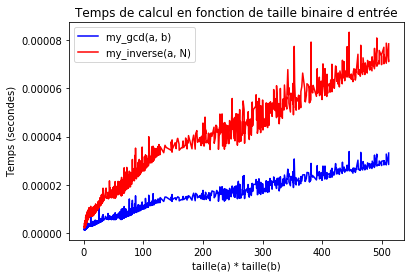

In [20]:
complexity_test()

<strong> 1.d] Exponentiation discrète binaire.</strong>

In [145]:
def my_expo_mod(x, y, n):
    """puissance modulaire: (x**y)%n avec x, y et n entiers"""
    result = 1
    while y>0:
        if y&1>0:
            result = (result*x)%n
        y >>= 1
        x = (x*x)%n
    return result

<h2> Exercice 2 :Test naı̈f et recherche des nombres de Carmichael</h2>

<strong> 2.a ] Effectue le test naif de primalité sur un entier n.</strong>

In [146]:
def first_test(n):
    for k in range(2, int(floor(sqrt(n)) + 1)):
        if n % k == 0:
            return False
    return True

In [124]:
first_test(8911)

False

<strong>2.b ] La complexité de first_test</strong>

On compte le nombre d'opérations élémentaires (i.e. le nombre de divisions): il y a sqrt(n) divisions dans l'algorithme. L'algorithme a une complexite de O(sqrt(n)).
L'entier n est représenté avec t = log2(n) chiffres binaires.
L'algorithme a donc une complexité de O(sqrt(n)) = O(sqrt(2^t))
L'algorithme a une complexite exponentielle.

<strong>2.c ] Compte les nombres premiers inférieurs à 10^5 </strong>

In [147]:
def count_prime_10e5():
    cpt=0
    i=2
    while i<10**5:
        if first_test(i)==True:
            cpt+=1
        i+=1
    return cpt

<strong>2.d ] Carmichael qui sont inférieurs à 10^5 </strong>

In [149]:
def is_carmichael(n):
    if first_test(n) == False:
        a = 2
        ok = 1
        while a != n and ok == 1:
            if my_gcd(n, a) == 1:
                if my_expo_mod(a, n, n) != a:
                    ok = 0
            a += 1
        if a == n and ok == 1:
            return True
    return False

def gen_carmichael(n):
    l = []
    res = []
    for i in range(2,n):
        if is_carmichael(i):
            l.append(i)
    return l
gen_carmichael(100000)

[561,
 1105,
 1729,
 2465,
 2821,
 6601,
 8911,
 10585,
 15841,
 29341,
 41041,
 46657,
 52633,
 62745,
 63973,
 75361]

<strong>2.e] Carmichael de longueur binaire k avec 3 facteurs premiers </strong>

In [150]:
def interval(n):
    mini=[]
    maxi=[]
    for i in range(0,n):
        mini.append(str(0))
        maxi.append(str(1))
    mini[0] =1  
    deb=bin(int(''.join(map(str, mini)), 2) << 0)
    fin=bin(int(''.join(map(str, maxi)), 2) << 0)
    deb=int(deb,2)
    fin=int(fin,2)
    return [deb,fin]

def carmichael_list(debut,fin, primes):
    list_carmichael = []
    possible_n = list(set(list(range(debut, fin, 1))) - set(primes))
    list_carmichael = []
    for n in possible_n:
        if is_carmichael(n):
            list_carmichael.append(n)
    return list_carmichael

In [151]:
def gen_carmichael_3(k):
    debut,fin=interval(k)
    list_carmichael_3_factors =[]
    count_primes = 0
    primes = []
    for i in range(2, fin):
        if first_test(i) == True:
            count_primes += 1
            primes.append(i)
    list_carmichael = carmichael_list(debut,fin, primes)
    
    for carmichael_number in list_carmichael:
        counter = 0
        temp_number = carmichael_number
        for p in primes:
            if temp_number % p == 0:
                temp_number = temp_number//p
                counter += 1
            if p > temp_number or counter == 3:
                break
        if counter == 3 and temp_number == 1:
            list_carmichael_3_factors.append(carmichael_number)
    return random.choice(list_carmichael_3_factors)

In [152]:
#pour k=11
gen_carmichael_3(11)

1729

<strong>2.f] Plus grand Carmichael trouvé qvec la fonction gen_carmichael </strong>

In [67]:
gen_carmichael(10**6)[-1]

997633

<strong>2.g] Soit à demontrer qu’il n’existe qu’un nombre fini de nombres de
Carmichael de la forme pqr avec p < q < r trois nombres premiers pour p fixé </strong>

<strong>2.h] Les nombres de Carmichael de la forme 3qr et de la forme 5qr avec q et r
premiers. </strong>

In [153]:
def liste_carmichael(p):
    if p < 3:
        print("Entrez un nombre supérieur à 2")
        return "NULL"
    if first_test(p) == False :
        print("Entrer un nombre premier ")
        return 'NULL'
    l = []
    for h in range(2,p):
        a = (p-1)*(p+h)
        q_1 = []
        for i in range(1,a+1):
            if (a%i) == 0:
                q_1.append(i)
        for e in q_1:
            if (e+1) <= p or first_test(e+1) == False :
                continue
            else:
                q = e+1
                r = (p*q - 1)//h + 1
                if(first_test(r)):
                    if ((p*q*r)-1)%(r-1) == 0 and ((p*q*r)-1)%(q-1) == 0:
                        print(p,"*",q,"*",r,"=",p*q*r)
                        l.append(p*q*r)            
    return l

In [154]:
liste_carmichael(7)

7 * 19 * 67 = 8911
7 * 13 * 31 = 2821
7 * 31 * 73 = 15841
7 * 23 * 41 = 6601
7 * 13 * 19 = 1729
7 * 73 * 103 = 52633


[8911, 2821, 15841, 6601, 1729, 52633]

<h2> Exercice 3 :Test de Fermat</h2>

<strong>3.a] Test de primalité de Fermat </strong>

In [117]:
def test_fermat(N):
    if (N%2) == 0:
        return False,'COMPOSITE'
    a = random.randint(2,N-1)
    if ((my_expo_mod(a,N-1,N) != 1)):
        return False,'COMPOSITE'
    return True,"PROBABLY PRIME"

In [118]:
test_fermat(11)

(True, 'PROBABLY PRIME')

<strong>3.b] Test de la fonction test_fermat </strong>

In [129]:
def tester_fermat_test():
    c_list = gen_carmichael(100000)
    r_list = [random.randrange(2, 1.e8) for i in range(1000)]
    com_list = [n for n in r_list if first_test(n) == False]
    for c in c_list:
        print(c,test_fermat(c)[1])
    for r in r_list:
        print(r,test_fermat(r)[1])
    for com in com_list:
        print(com,test_fermat(com)[1])

In [130]:
tester_fermat_test()

561 PROBABLY PRIME
1105 PROBABLY PRIME
1729 COMPOSITE
2465 COMPOSITE
2821 PROBABLY PRIME
6601 PROBABLY PRIME
8911 PROBABLY PRIME
10585 PROBABLY PRIME
15841 PROBABLY PRIME
29341 PROBABLY PRIME
41041 PROBABLY PRIME
46657 PROBABLY PRIME
52633 PROBABLY PRIME
62745 COMPOSITE
63973 COMPOSITE
75361 PROBABLY PRIME
40137557 COMPOSITE
6851523 COMPOSITE
32459491 PROBABLY PRIME
95436848 COMPOSITE
40998127 COMPOSITE
26618902 COMPOSITE
70451406 COMPOSITE
88973536 COMPOSITE
35484504 COMPOSITE
98552188 COMPOSITE
21990863 COMPOSITE
2731209 COMPOSITE
34563834 COMPOSITE
41319235 COMPOSITE
99272159 COMPOSITE
25651450 COMPOSITE
49062065 COMPOSITE
82350781 PROBABLY PRIME
58448745 COMPOSITE
56789768 COMPOSITE
59843247 COMPOSITE
92492370 COMPOSITE
72795602 COMPOSITE
11237277 COMPOSITE
12147169 COMPOSITE
97410310 COMPOSITE
35611376 COMPOSITE
92536510 COMPOSITE
37090355 COMPOSITE
85271846 COMPOSITE
97842581 COMPOSITE
68907891 COMPOSITE
34306020 COMPOSITE
42922916 COMPOSITE
75385419 COMPOSITE
67322290 COMPOSITE


18547630 COMPOSITE
56813856 COMPOSITE
91937831 COMPOSITE
40289015 COMPOSITE
73221664 COMPOSITE
27929187 COMPOSITE
10988968 COMPOSITE
87365957 COMPOSITE
45608957 PROBABLY PRIME
8374506 COMPOSITE
7030527 COMPOSITE
80337865 COMPOSITE
893975 COMPOSITE
78147827 COMPOSITE
68929407 COMPOSITE
78109199 COMPOSITE
37763538 COMPOSITE
48981937 PROBABLY PRIME
95383616 COMPOSITE
10869373 COMPOSITE
38951578 COMPOSITE
36164019 COMPOSITE
21842189 COMPOSITE
46994623 COMPOSITE
22386461 PROBABLY PRIME
168970 COMPOSITE
69694155 COMPOSITE
5901981 COMPOSITE
16635334 COMPOSITE
21322860 COMPOSITE
25114264 COMPOSITE
80614133 COMPOSITE
771470 COMPOSITE
1810682 COMPOSITE
48986102 COMPOSITE
93311650 COMPOSITE
27471495 COMPOSITE
59789334 COMPOSITE
36999840 COMPOSITE
31077979 COMPOSITE
47417454 COMPOSITE
30770410 COMPOSITE
44318605 COMPOSITE
5844699 COMPOSITE
37597492 COMPOSITE
19715527 COMPOSITE
82564560 COMPOSITE
16291666 COMPOSITE
15604098 COMPOSITE
88655197 COMPOSITE
70884479 COMPOSITE
85566927 COMPOSITE
45506281

88973536 COMPOSITE
35484504 COMPOSITE
98552188 COMPOSITE
21990863 COMPOSITE
2731209 COMPOSITE
34563834 COMPOSITE
41319235 COMPOSITE
99272159 COMPOSITE
25651450 COMPOSITE
49062065 COMPOSITE
58448745 COMPOSITE
56789768 COMPOSITE
59843247 COMPOSITE
92492370 COMPOSITE
72795602 COMPOSITE
11237277 COMPOSITE
12147169 COMPOSITE
97410310 COMPOSITE
35611376 COMPOSITE
92536510 COMPOSITE
37090355 COMPOSITE
85271846 COMPOSITE
97842581 COMPOSITE
68907891 COMPOSITE
34306020 COMPOSITE
42922916 COMPOSITE
75385419 COMPOSITE
67322290 COMPOSITE
78401528 COMPOSITE
79553718 COMPOSITE
12204684 COMPOSITE
48873097 COMPOSITE
1844448 COMPOSITE
53483588 COMPOSITE
11218595 COMPOSITE
12901498 COMPOSITE
16669537 COMPOSITE
41635571 COMPOSITE
52171019 COMPOSITE
27368825 COMPOSITE
67867852 COMPOSITE
87494546 COMPOSITE
47099775 COMPOSITE
62354770 COMPOSITE
41933295 COMPOSITE
9581965 COMPOSITE
82405000 COMPOSITE
12624485 COMPOSITE
73858276 COMPOSITE
96356668 COMPOSITE
65744415 COMPOSITE
87856455 COMPOSITE
99835416 COMPOS

31077979 COMPOSITE
47417454 COMPOSITE
30770410 COMPOSITE
44318605 COMPOSITE
5844699 COMPOSITE
37597492 COMPOSITE
19715527 COMPOSITE
82564560 COMPOSITE
16291666 COMPOSITE
15604098 COMPOSITE
88655197 COMPOSITE
70884479 COMPOSITE
85566927 COMPOSITE
7480617 COMPOSITE
3951771 COMPOSITE
65595468 COMPOSITE
35358636 COMPOSITE
53923831 COMPOSITE
20307972 COMPOSITE
45927501 COMPOSITE
61456581 COMPOSITE
12995495 COMPOSITE
72260814 COMPOSITE
12117113 COMPOSITE
7472593 COMPOSITE
72514684 COMPOSITE
34922815 COMPOSITE
29853874 COMPOSITE
13923752 COMPOSITE
95782028 COMPOSITE
85266453 COMPOSITE
97255729 COMPOSITE
11911967 COMPOSITE
12079301 COMPOSITE
63437470 COMPOSITE
75358625 COMPOSITE
36573398 COMPOSITE
46472670 COMPOSITE
38831394 COMPOSITE
70123308 COMPOSITE
29825149 COMPOSITE
88356398 COMPOSITE
97199863 COMPOSITE
20293170 COMPOSITE
55176375 COMPOSITE
638416 COMPOSITE
94747408 COMPOSITE
71797953 COMPOSITE
66210604 COMPOSITE
14150609 COMPOSITE
58019060 COMPOSITE
56454575 COMPOSITE
77844570 COMPOSITE

<strong>3.c] Estimation de la probabilité d’erreur de test_fermat </strong>

In [115]:
def fermat_erreur(N):
    cpt = 0
    for i in range(2,N):
        """f= random.randint(2,10**5)"""
        if test_fermat(i)[0] == first_test(i):
            cpt += 1
    print("Avec ",N,"éxécutions, la probailites d'erreur est de ", 100-(cpt/(N-2)*100),"%")
    return (N-2)-cpt

In [116]:
fermat_erreur(100000)

Avec  100000 éxécutions, la probailites d'erreur est de  0.14300286005720864 %


143

<h2> Exercice 4 :Test de Rabin et Miller</h2>

<strong>4.a] Test de primalité de Miller-Rabin </strong>

In [126]:
def test_miller_rabin(N, T=64):
    if(N==2 or N==3):
        return True,"PRIME"
    if (N%2) == 0:
        return  False,'COMPOSITE'
    m = N-1
    h = 0
    while (m%2) == 0:
        m//=2
        h+=1
    for i in range(T):
        a = random.randint(2,N-1)
        b = my_expo_mod(a,m,N)
        if b != 1 and b != (N-1):
            for j in range(h-1):
                if b != (N-1) and my_expo_mod(b,2,N) == 1:
                    return  False,'COMPOSITE'
                elif b == (N-1) :
                    break
                b = my_expo_mod(b,2,N)
            if b != (N-1):
                return  False,'COMPOSITE'
    return True,"PRIME"

In [128]:
test_miller_rabin(8911)

(False, 'COMPOSITE')

<strong>4.b] Test de la fonction du test_miller_rabin </strong>

In [131]:
def tester_millier_test():
    c_list = gen_carmichael(100000)
    r_list = [random.randrange(2, 1.e8) for i in range(1000)]
    com_list = [n for n in r_list if first_test(n) == False]
    for c in c_list:
        print(c,test_miller_rabin(c)[1])
    for r in r_list:
        print(r,test_miller_rabin(r)[1])
    for com in com_list:
        print(com,test_miller_rabin(com)[1])

In [132]:
tester_millier_test()

561 COMPOSITE
1105 COMPOSITE
1729 COMPOSITE
2465 COMPOSITE
2821 COMPOSITE
6601 COMPOSITE
8911 COMPOSITE
10585 COMPOSITE
15841 COMPOSITE
29341 COMPOSITE
41041 COMPOSITE
46657 COMPOSITE
52633 COMPOSITE
62745 COMPOSITE
63973 COMPOSITE
75361 COMPOSITE
80808181 COMPOSITE
77620874 COMPOSITE
49687422 COMPOSITE
9694069 COMPOSITE
30632317 COMPOSITE
5239708 COMPOSITE
16686436 COMPOSITE
73579423 COMPOSITE
28523394 COMPOSITE
49992150 COMPOSITE
45077587 PRIME
30278160 COMPOSITE
86151108 COMPOSITE
95657516 COMPOSITE
16216767 COMPOSITE
77515734 COMPOSITE
79443308 COMPOSITE
80429116 COMPOSITE
31454432 COMPOSITE
63555368 COMPOSITE
59604548 COMPOSITE
50751388 COMPOSITE
92605983 COMPOSITE
92202776 COMPOSITE
68060781 COMPOSITE
32985109 COMPOSITE
45394264 COMPOSITE
16946087 COMPOSITE
91725805 COMPOSITE
90313001 COMPOSITE
32526371 COMPOSITE
69863554 COMPOSITE
44765867 COMPOSITE
23539857 COMPOSITE
58596297 COMPOSITE
86675092 COMPOSITE
92260419 COMPOSITE
8084396 COMPOSITE
25926421 COMPOSITE
16319053 COMPOSITE

8223097 COMPOSITE
98407783 COMPOSITE
63334416 COMPOSITE
38826906 COMPOSITE
25728335 COMPOSITE
51449678 COMPOSITE
91549742 COMPOSITE
37552433 COMPOSITE
64588019 COMPOSITE
69872919 COMPOSITE
24188832 COMPOSITE
25896624 COMPOSITE
89179441 COMPOSITE
57242647 COMPOSITE
76688548 COMPOSITE
21652228 COMPOSITE
42539498 COMPOSITE
69090928 COMPOSITE
45917108 COMPOSITE
23945754 COMPOSITE
36597432 COMPOSITE
68365688 COMPOSITE
80255474 COMPOSITE
67518971 COMPOSITE
62644881 COMPOSITE
8561735 COMPOSITE
75819373 COMPOSITE
91386857 COMPOSITE
50269256 COMPOSITE
86503080 COMPOSITE
22660558 COMPOSITE
14559396 COMPOSITE
68796293 COMPOSITE
97903036 COMPOSITE
64106826 COMPOSITE
65645283 COMPOSITE
8365775 COMPOSITE
71220549 COMPOSITE
73661691 COMPOSITE
53244811 PRIME
66797636 COMPOSITE
46876807 COMPOSITE
38697297 COMPOSITE
37757830 COMPOSITE
48569894 COMPOSITE
53973872 COMPOSITE
15142638 COMPOSITE
82175593 COMPOSITE
4044497 PRIME
64018958 COMPOSITE
96958514 COMPOSITE
77703697 COMPOSITE
24684732 COMPOSITE
60383

93038688 COMPOSITE
97239258 COMPOSITE
6284207 COMPOSITE
15633327 COMPOSITE
80808181 COMPOSITE
77620874 COMPOSITE
49687422 COMPOSITE
9694069 COMPOSITE
30632317 COMPOSITE
5239708 COMPOSITE
16686436 COMPOSITE
73579423 COMPOSITE
28523394 COMPOSITE
49992150 COMPOSITE
30278160 COMPOSITE
86151108 COMPOSITE
95657516 COMPOSITE
16216767 COMPOSITE
77515734 COMPOSITE
79443308 COMPOSITE
80429116 COMPOSITE
31454432 COMPOSITE
63555368 COMPOSITE
59604548 COMPOSITE
50751388 COMPOSITE
92605983 COMPOSITE
92202776 COMPOSITE
68060781 COMPOSITE
32985109 COMPOSITE
45394264 COMPOSITE
16946087 COMPOSITE
91725805 COMPOSITE
90313001 COMPOSITE
32526371 COMPOSITE
69863554 COMPOSITE
44765867 COMPOSITE
23539857 COMPOSITE
58596297 COMPOSITE
86675092 COMPOSITE
92260419 COMPOSITE
8084396 COMPOSITE
25926421 COMPOSITE
16319053 COMPOSITE
83859027 COMPOSITE
12353272 COMPOSITE
58235359 COMPOSITE
72703559 COMPOSITE
54884125 COMPOSITE
3696226 COMPOSITE
1313779 COMPOSITE
59972132 COMPOSITE
91430057 COMPOSITE
87982255 COMPOSITE

54783174 COMPOSITE
91632433 COMPOSITE
25618078 COMPOSITE
78213157 COMPOSITE
13005446 COMPOSITE
88078500 COMPOSITE
17171909 COMPOSITE
51561971 COMPOSITE
3424180 COMPOSITE
79127485 COMPOSITE
37139766 COMPOSITE
98088806 COMPOSITE
4883679 COMPOSITE
11085501 COMPOSITE
55315395 COMPOSITE
23454611 COMPOSITE
69554546 COMPOSITE
99831526 COMPOSITE
5108285 COMPOSITE
32251202 COMPOSITE
51149503 COMPOSITE
68403051 COMPOSITE
86182823 COMPOSITE
90301890 COMPOSITE
62581132 COMPOSITE
26311304 COMPOSITE
23897419 COMPOSITE
56147101 COMPOSITE
91736203 COMPOSITE
30482349 COMPOSITE
8336423 COMPOSITE
34003190 COMPOSITE
29668346 COMPOSITE
88001132 COMPOSITE
28060754 COMPOSITE
80859303 COMPOSITE
78523618 COMPOSITE
34579505 COMPOSITE
82995054 COMPOSITE
83029052 COMPOSITE
39691370 COMPOSITE
27132277 COMPOSITE
389382 COMPOSITE
46251584 COMPOSITE
83307775 COMPOSITE
10046376 COMPOSITE
6340271 COMPOSITE
60878240 COMPOSITE
46203880 COMPOSITE
4419708 COMPOSITE
92291490 COMPOSITE
26587752 COMPOSITE
49117528 COMPOSITE
4

<strong>4.c] Estimation de la probabilité d’erreur de test_miller_rabin </strong>

In [133]:
def mr_erreur(N):
    cpt = 0
    for i in range(2,N):
        """mr= random.randint(2,10**5)"""
        if test_miller_rabin(i)[0] == first_test(i):
            cpt += 1
            continue
        print(mr)
    print("Avec ",N,"éxécutions, la probailites d'erreur est de ", 100-(cpt/(N-2)*100),"%")
    return (N-2)-cpt

In [134]:
mr_erreur(100000)

Avec  100000 éxécutions, la probailites d'erreur est de  0.0 %


0

<strong>4.d] Fonction gen_rsa </strong>

In [139]:
def gen_rsa(t):
    if t<3:
        print('Entrer une valeur plus grande')
        return 0 
    l=[]
    inf = int(pow(2,t-1))
    sup = int(pow(2,t))
    p=0
    q=0
    while(1):
        i = random.randint(inf,sup)
        if (test_miller_rabin(i)):
            p = i
            l.append(p)
            break
            
    while(1):
        j = random.randint(inf,sup)
        if (test_miller_rabin(j)):
            if j != p:
                q = j
                l.append(q)
                break
    
    print(l)
    return p*q

In [140]:
gen_rsa(500)

[3141503012130176244098881805078725143476535976354481269967733458604817437857645382227972931894825158650308236693323032089252901524524709194164180863853, 1896490560395485789688414487978880881528675279289076698477202786677825272216096421748377046375390343091459616765431881803985519588196317066892173621912]


5957830807958864537630620560073772450277093967089698641687716759516842808432487894681351697578561290651018952446462310360667807520173053282601896753716799556806050333638713219762997980858395485052265944798622441548847324189764490101756419540338643176096655791256606253052705258144950510178371969546936